In [ ]:
#import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load the dataset
df=pd.read_csv('/content/drive/MyDrive/Machine_Learning/creditcard (1).csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#V1,V2,V3........V28 are unwanted columns, we keep only important columns
df=df[['Time','Amount','Class']]

In [ ]:
#Check datasize
df.shape

(284807, 3)

In [ ]:
#check for null values
df.isnull().sum()

Time      0
Amount    0
Class     0
dtype: int64

In [ ]:
#cross check null values with datatype
df.dtypes

Time      float64
Amount    float64
Class       int64
dtype: object

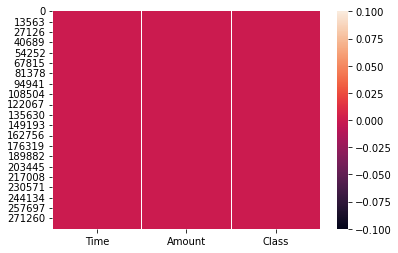

In [ ]:
#visualize null values
sb.heatmap(df.isnull())
plt.show()

In [ ]:
#check for duplicate values
df.duplicated().sum()

4857

In [ ]:
#check for data balancing
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#drop duplicate values
#df.drop_duplicates(inplace=True)

In [ ]:
#check for duplicate values
df.duplicated().sum()

4857

In [ ]:
#check for data balancing
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

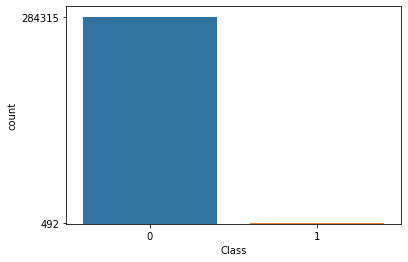

In [ ]:
#visualise data balancing
sb.countplot(data=df,x='Class')
f=df['Class'].value_counts()
plt.yticks(f)
plt.show()

In [ ]:
#we clearly see the data is unbalanced,so need to balance the data
#Firstly we select input and output
X=df.drop('Class',axis=1)
Y=df['Class']

In [ ]:
#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
#check training data size
X_train.shape,Y_train.shape

((199364, 2), (199364,))

In [ ]:
#check testing data size
X_test.shape,Y_test.shape

((85443, 2), (85443,))

In [ ]:
#check Testing output data balancing
Y_test.value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [ ]:
#apply standard scaler on input
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
#Perform data balancing
#convert minority data to majority data, apply RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
#create object of RandomOverSampler
ros=RandomOverSampler()

In [ ]:
#apply RandomOverSampler on training data
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [ ]:
#apply RandomOverSampler on testing data
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [ ]:
#Check data balancing
Y_test1.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [ ]:
#now the data is balanced
#create neural network
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
model=tf.keras.Sequential([
    #first hidden layer
    tf.keras.layers.Dense(units=64,activation='relu',input_dim=2,
                          kernel_regularizer=regularizers.l2(0.01)),Dropout(0.30),
    #second hidden layer
    tf.keras.layers.Dense(units=32,activation='relu',
                          kernel_regularizer=regularizers.l2(0.01)),Dropout(0.30), 
    #third hidden layer
    tf.keras.layers.Dense(units=16,activation='relu',
                          kernel_regularizer=regularizers.l2(0.01)),Dropout(0.30),
    #fourth hidden layer
    tf.keras.layers.Dense(units=8,activation='relu',
                          kernel_regularizer=regularizers.l2(0.01)),Dropout(0.30),                       
    #output layer
    tf.keras.layers.Dense(units=1,activation='sigmoid',
                          kernel_regularizer=regularizers.l2(0.01)),                                                                    


])

In [ ]:
#Check model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                192       
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dropout_29 (Dropout)        (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dropout_30 (Dropout)        (None, 16)                0         
                                                                 
 dense_38 (Dense)            (None, 8)                

In [ ]:
#compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#create a procedure for early stopping 
#call inbuilt class : EarlyStopping 
from tensorflow.keras.callbacks import EarlyStopping
#create object of EarlyStopping class
cb=EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False

)

In [ ]:
#train the model
trained_model=model.fit(X_train1,Y_train1,epochs=5000,validation_data=(X_test1,Y_test1),batch_size=64,callbacks=cb)

Epoch 1/5000
6219/6219 [==============================] - 22s 3ms/step - loss: 0.7074 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5000
6219/6219 [==============================] - 22s 4ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5000
6219/6219 [==============================] - 20s 3ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5000
6219/6219 [==============================] - 18s 3ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5000
6219/6219 [==============================] - 18s 3ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/5000
6219/6219 [==============================] - 20s 3ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/5000
6219/6219 [==============================] - 18s 3ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0

In [ ]:
#Evaluate the model
print('Training loss and Accuracy:',model.evaluate(X_train1,Y_train1))
print('Testing loss and Accuracy:',model.evaluate(X_test1,Y_test1))

12438/12438 [==============================] - 20s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Training loss and Accuracy: [0.6931368112564087, 0.5]
5332/5332 [==============================] - 8s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Testing loss and Accuracy: [0.6931177973747253, 0.5]


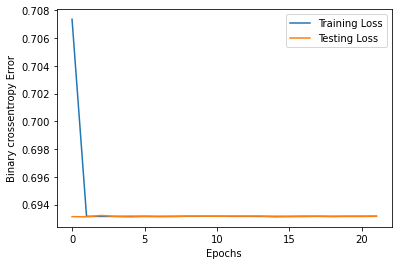

In [ ]:
#visualisation for loss of training and testing
plt.plot(trained_model.history['loss'],label='Training Loss')
plt.plot(trained_model.history['val_loss'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary crossentropy Error')
plt.legend()
plt.show()

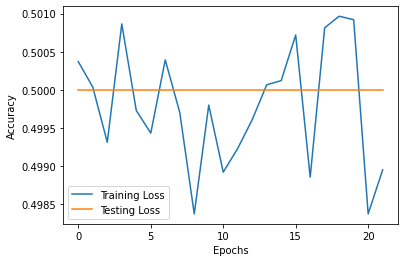

In [ ]:
#visualisation for accuracy of training and testing
plt.plot(trained_model.history['accuracy'],label='Training Loss')
plt.plot(trained_model.history['val_accuracy'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
Y_pred=model.predict(X_test1).round(2)

5332/5332 [==============================] - 7s 1ms/step


In [ ]:
Y_pred

array([[0.5],
       [0.5],
       [0.5],
       ...,
       [0.5],
       [0.5],
       [0.5]], dtype=float32)

In [ ]:
Y_pred=np.where(Y_pred>=0.5,1,0)

In [ ]:
print(np.where(Y_pred==1))

(array([     0,      1,      2, ..., 170613, 170614, 170615]), array([0, 0, 0, ..., 0, 0, 0]))


In [ ]:
Y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
#generate classification report 
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test1,Y_pred))
print(confusion_matrix(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     85308
           1       0.50      1.00      0.67     85308

    accuracy                           0.50    170616
   macro avg       0.25      0.50      0.33    170616
weighted avg       0.25      0.50      0.33    170616

[[    0 85308]
 [    0 85308]]
